<a href="https://colab.research.google.com/github/darpan02-cypher/Knowledge-Data-and-Discovery/blob/main/Homework5_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [79]:
df = pd.read_csv('/content/AdultUCI (1).csv')
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


#1. Remove all the categorical features. You need to retain the target variable as the ground truth to compare your k-means model prediction

In [80]:
df.dropna(inplace=True) # Remove rows with missing values

In [81]:
le = LabelEncoder() # Encode 'income' column to numerical values
df['income'] = le.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


#2. Normalize all the numeric variables.

In [82]:
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] # List of numeric columns
df_numeric = df[numeric_cols] #
scaler = StandardScaler() # Initialize StandardScaler
df_scaled = scaler.fit_transform(df_numeric) # Scale numeric features

#3. Perform k-means cluster analysis based on the Euclidean distance.

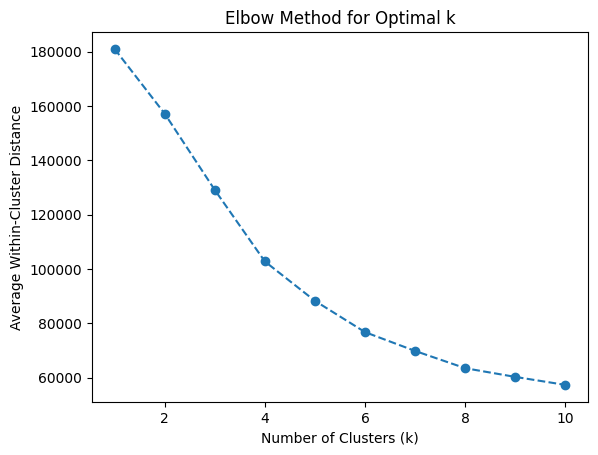

In [83]:
avg_within_cluster_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=3456789)
    kmeans.fit(df_scaled)
    avg_within_cluster_distances.append(kmeans.inertia_)


plt.plot(range(1, 11), avg_within_cluster_distances, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Within-Cluster Distance')
plt.title('Elbow Method for Optimal k')
plt.show()

#4. Please check the average within cluster distances for different k values (from k =1 to k= 10).

In [84]:
X_scaled_df = pd.DataFrame(df_scaled, columns=numeric_cols) # Create a DataFrame with scaled numeric features

In [85]:
# Calculate within-cluster sum of squares for different k values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df) # Use the scaled data without encoded categorical features
    wcss.append(kmeans.inertia_)

# Display the WCSS values for each k
print("Within-Cluster Sum of Squares (WCSS) for k=1 to 10:")
for i, inertia in enumerate(wcss):
    print(f"k={i+1}: {inertia}")

Within-Cluster Sum of Squares (WCSS) for k=1 to 10:
k=1: 180972.0000000004
k=2: 151321.51782798817
k=3: 124478.35086414304
k=4: 102758.4348882797
k=5: 88264.2707997187
k=6: 76751.661646192
k=7: 69497.5327836972
k=8: 63479.14670328014
k=9: 58990.754492950466
k=10: 55934.39914956641


#5. If we decide that k takes the value of 2 in order to match the two ground truth groups(small income and big income),  report the k-means model accuracy.


In [86]:
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

predicted_labels = [1 if label == 0 else 0 for label in kmeans.labels_]

accuracy = accuracy_score(df['income'], predicted_labels)
print(f"K-Means Model Accuracy (k={optimal_k}): {accuracy * 100:.2f}%")

K-Means Model Accuracy (k=2): 75.60%
